In [3]:
import os
os.chdir('../')
import RunDemo
data=RunDemo.main()

ImSeg demo called.  Displaying full-size demo image.
To view must-link constraints, hover mouse over image and press <Return>.
To continue demo, hover over image and press <Return> again.
All experiments complete.
Plotting segmented image.


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageTk


In [5]:
SDPSS_time = data['SDPSS_time']
NES_time = data['NES_time']
num_pixels = data['num_pixels']
SDPSS_eig_calls = data['SDPSS_eig_calls']
NES_eig_calls = data['NES_eig_calls']
im_seg_RGB_arr = data['im_seg_RGB_arr']


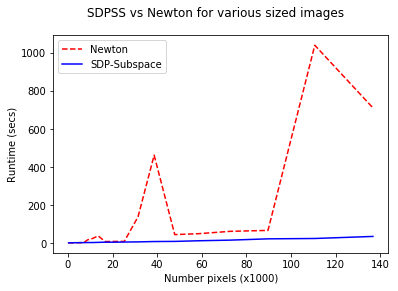

In [6]:
# Saves figure of performance comparison 
fig = plt.figure()
fig.canvas.draw()
ax = fig.add_subplot(111)
plt.plot(num_pixels, NES_time, 'r--', label='Newton')
plt.plot(num_pixels, SDPSS_time, 'b', label='SDP-Subspace')

fig.suptitle('SDPSS vs Newton for various sized images')
plt.xlabel('Number pixels (x1000)')
plt.ylabel('Runtime (secs)')
plt.legend()

labels=ax.get_xticks().tolist()
labels = [np.int16(l/1000) for l in labels]
ax.set_xticklabels(labels)
plt.savefig('demo_fig1.png')

In [6]:
num_pixels

array([[   266.],
       [   414.],
       [   638.],
       [  1036.],
       [  1564.],
       [  2451.],
       [  3834.],
       [  5963.],
       [  9408.],
       [ 14700.],
       [ 22794.],
       [ 35752.],
       [ 55965.],
       [ 87637.],
       [136746.]])

In [5]:
NES_time

array([[1.81370020e-01],
       [1.76473379e-01],
       [3.48216057e-01],
       [3.20227861e-01],
       [3.92493010e-01],
       [3.97217274e-01],
       [6.12343311e-01],
       [1.21653533e+00],
       [2.41336703e+00],
       [2.23375807e+01],
       [9.18956089e+00],
       [1.72264724e+01],
       [2.53712274e+02],
       [9.77081234e+01],
       [1.32981891e+02]])

In [9]:
im_seg_RGB = Image.fromarray(im_seg_RGB_arr)

In [10]:
im_seg_RGB.show(title="Newton Image")

In [7]:
# Run ImSeg

from ImSeg import ImSeg

cvx_verbose = False

# person_walking_small.jpg
#sig_dist=4 # default: 3-5
#sig_feat=7 # default: 5-7
#max_dist=3 # default: 3-5


sig_dist=3 # default: 3-5
sig_feat=4 # default: 5-7
max_dist=3 # default: 3-5


# person_walking_small.jpg
use_RGB = True

# amoeba.jpg
#use_RGB = False
is_demo_mode=True

verbosity=2

#im_path = 'test/amoeba.jpg'
im_path = 'test/tree.jpeg'
#im_path = 'test/tree_medium.jpeg'
#im_path = 'test/tree_small.jpeg'
#im_path = 'test/tree_tiny.jpeg'

#im_path = 'test/person_walking_small.jpg'
#im_path = 'test/person_walking.jpg'

attempt_resize=False
resize_min_num_pix = 200
resize_ratio = 0.5

return_data = True


# person_walking_small.jpg
#eigsh_tol_init = 1e-4
#eigsh_tol_update = 5e-1
#eigsh_tol_min = 1e-4

#lobpcg_tol_init = 1e-4
#lobpcg_tol_update = 5e-1
#lobpcg_tol_min = 1e-4

# tree
eigsh_tol_init = 1e-4
eigsh_tol_update = 5e-1
eigsh_tol_min = 1e-5

lobpcg_tol_init = 1e-4
lobpcg_tol_update = 5e-1
lobpcg_tol_min = 1e-4

pr_tol=1e-5
du_tol=1e-5
gap_tol=1e-5

#eig_solver = "eigsh"
eig_solver = "lobpcg"
SDPSS_max_iters = 20
SDPSS_pr_update = 1

use_NewtonEigSolver = True
#use_NewtonEigSolver = False
#use_Newton_step = True
use_Newton_step = False
Newton_max_iters = 20
Newton_eig_solver="eigsh"
#Newton_eig_solver="lobpcg"


must_link_list1 = []; must_link_list2 = [];
#must_link_list1 = must_link_list1; must_link_list2 = must_link_list2;

#must_link_list1 = [[227, 102], [29, 125], [55, 65], [222, 20], [125, 55], [141, 108]]
#must_link_list2 = [[71, 129], [105, 123], [132, 139], [197, 135], [235, 159], [243, 238], [160, 266], [23, 169], [34, 216], [42, 247], [154, 180], [107, 207], [156, 226]]

# Small tree
#must_link_list1 = [[59, 11], [42, 15], [31, 12]]
#must_link_list2 = [[17, 17], [14, 33], [29, 33], [57, 32]]

# Med tree
#must_link_list1 = [[130, 32], [83, 21], [14, 11], [67, 32]]
#must_link_list2 = [[37, 25], [33, 40], [26, 61], [25, 78], [95, 71], [120, 62]]

# Full tree
#must_link_list1 = [[258, 72], [169, 75], [144, 39], [39, 17], [19, 66]]
#must_link_list2 = [[66, 44], [73, 68], [42, 158], [134, 138], [206, 108], [258, 157], [92, 124]]


# PERSON WALKING SMALL
#must_link_list1 = [[136, 16], [127, 35], [149, 38], [157, 52], [158, 60], [119, 59], 
#                   [121, 49], [129, 79], [128, 94], [132, 132], [132, 121], [142, 88], 
#                   [143, 122], [139, 143], [139, 150], [138, 68], [138, 49]]
#must_link_list2 = [[81, 40], [52, 40], [57, 25], [85, 23], [97, 39], [37, 14], [23, 79], 
#                   [45, 129], [75, 88], [122, 149], [115, 105], [114, 65], [111, 40], [123, 9], 
#                   [148, 8], [160, 28], [169, 51], [163, 74], [157, 93], [154, 145], [199, 153], 
#                   [199, 65], [199, 8], [199, 39], [183, 116]]


# PERSON WALKING 
#must_link_list1 = [[273, 33], [279, 88], [235, 116], [265, 154], [318, 114], 
#                   [281, 192], [264, 266], [275, 300]]
#must_link_list2 = [[222, 286], [164, 73], [127, 81], [36, 32], [40, 106], [34, 163],
#                   [227, 36], [378, 25], [394, 144], [391, 281], [217, 141], [335, 119]]

#
# TO-DOs:
# - Fix 1/0 in NewtonSolver
#


[im_RGB_arr, adj_mat, must_link_list1, must_link_list2, \
 X_sub, V_sub, im_seg_RGB_arr, im_RGB, N, data_ImSeg] \
    = ImSeg(im_path = im_path, \
            attempt_resize=attempt_resize, \
            return_data=return_data, \
            resize_min_num_pix=resize_min_num_pix, \
            resize_ratio=resize_ratio, \
             cvx_verbose=cvx_verbose, eig_solver = eig_solver, \
             pr_tol=pr_tol, du_tol=du_tol, gap_tol=gap_tol, \
             sig_dist=sig_dist, sig_feat=sig_feat, max_dist=max_dist, \
             eigsh_tol_init=eigsh_tol_init, \
             eigsh_tol_update=eigsh_tol_update, eigsh_tol_min=eigsh_tol_min, \
             lobpcg_tol_init=lobpcg_tol_init, \
             lobpcg_tol_update=lobpcg_tol_update, lobpcg_tol_min=lobpcg_tol_min, \
             SDPSS_max_iters=SDPSS_max_iters, SDPSS_pr_update=SDPSS_pr_update, \
             must_link_list1 = must_link_list1, must_link_list2 = must_link_list2, \
             use_RGB=use_RGB, \
             use_NewtonEigSolver=use_NewtonEigSolver, Newton_eig_solver=Newton_eig_solver, \
             use_Newton_step=use_Newton_step, Newton_max_iters=Newton_max_iters, \
             is_demo_mode=is_demo_mode, verbosity=verbosity);

Click on pixels in region 1.  Press <Return> to change to region 2.
Clicked at (216, 55)
Clicked at (170, 44)
Clicked at (30, 15)
Clicked at (21, 85)
Click on pixels in region 2.  Press <Return> when done.
Clicked at (62, 77)
Clicked at (58, 159)
Clicked at (234, 114)
Clicked at (252, 168)
Clicked at (121, 138)
Image segmentation (NCuts) called with link constraints
   for image of size (284, 177)
GetConstraintNullspace time  :  0.01
GetAdjMat time               :  0.40

SDPSubspaceSolver called with eigenvalue solver lobpcg and SDP solver cvx
    |                                         | Runtime Ratios | 
 it | probj        dures    prres    dugap    | eig  SDP  main | eigtol   prdim  time |  y[0]         y[1]
  0 | 8.80805e-04 -1.00e+00 0.00e+00 5.23e-12 | 0.00 0.53 0.47 | 1.0e-04     2   0.06 |  8.80805e-04  4.40956e+01
  1 | 6.50472e-04 -7.11e-01 1.11e-16 4.90e-12 | 0.88 0.03 0.09 | 1.0e-04     3   0.35 |  6.50472e-04  3.25167e+01
  2 | 5.13347e-04 -1.01e-01 8.88e-16 1.18e-11 | 0

[[81, 40],
 [52, 40],
 [57, 25],
 [85, 23],
 [97, 39],
 [37, 14],
 [23, 79],
 [45, 129],
 [75, 88],
 [122, 149],
 [115, 105],
 [114, 65],
 [111, 40],
 [123, 9],
 [148, 8],
 [160, 28],
 [169, 51],
 [163, 74],
 [157, 93],
 [154, 145],
 [199, 153],
 [199, 65],
 [199, 8],
 [199, 39],
 [183, 116]]

In [8]:
import numpy as np
x = np.arange(10)
y = np.sin(x)
np.savez_compressed('text_file.npz', x=x, y=y)

In [9]:
os.path.exists('text_file.npz')

True

In [10]:
file = np.load('text_file.npz')
print(file['x'])

[0 1 2 3 4 5 6 7 8 9]


In [4]:
# This code plots (t,f) vals for SDPSS and NES
#
# Might help with developing a primal-dual method (!!!)
#


import matplotlib
from matplotlib.pyplot import plot
import numpy as np

In [5]:
y0 = np.zeros((len(data_ImSeg[0][1]),1))
y1 = np.zeros((len(data_ImSeg[0][1]),1))
for i in range(0,len(data_ImSeg[0][1])):
    y0[i] = data_ImSeg[0][1][i][0][0]
    y1[i] = -data_ImSeg[0][1][i][1][0]

f = np.zeros((len(data_ImSeg[1][1]),1))
t = np.zeros((len(data_ImSeg[1][1]),1))
for i in range(0,len(data_ImSeg[1][1])):
    f[i] = data_ImSeg[1][1][i][0][0]
    t[i] = data_ImSeg[1][1][i][1][0]

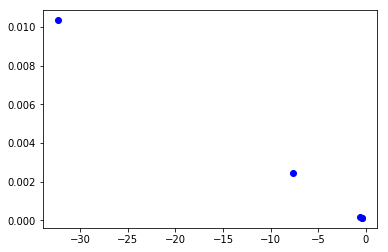

In [6]:
start = 1
end = len(data_ImSeg[0][1])-1
plot(y1[start:end], y0[start:end], 'bo')

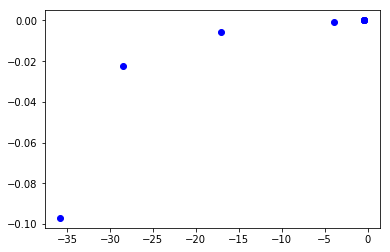

In [7]:
start = 1
end = len(data_ImSeg[1][1])-1
plot(t[start:end], f[start:end], 'bo')

In [20]:
import copy
im_width = 4000
im_height = 1800
num_pix = im_width*im_height

resize_min_num_pix = 200
resize_ratio = 0.5

resize_dims_list = list()
resize_ratio_list = list()

resize_dims_list.append((im_width, im_height))
resize_ratio_list.append(1)
resize_ratio_list.append(resize_ratio)

num_pix_temp = resize_dims_list[-1][0]*resize_dims_list[-1][1]

while ( num_pix_temp >= resize_min_num_pix):
    im_size_resize = (int(round(resize_ratio*resize_dims_list[-1][0])), \
                      int(round(resize_ratio*resize_dims_list[-1][1])))
    resize_dims_list.append(im_size_resize)
    resize_ratio_list.append(resize_ratio**(len(resize_dims_list)))
    num_pix_temp = num_pix * (resize_ratio_list[-1]**2)
resize_ratio_list.pop()
print(resize_dims_list)
print(resize_ratio_list)




[(4000, 1800), (2000, 900), (1000, 450), (500, 225), (250, 112), (125, 56), (62, 28), (31, 14)]
[1, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125]


In [8]:
import numpy as np
iter_data = (np.zeros((100,0)), np.zeros((5,0)), , ())

In [31]:
v = list()

In [32]:
v.append(np.random.rand(100,1))

In [ ]:
im_width = 3890
im_height = 1275
num_pix_full = im_width*im_height

rescale_size_tiny = 1500
rescale_size_med = 5000

# Check if pic at least 2(?) x rescale size!

rescale_ratio_tiny = 1/(np.sqrt(num_pix_full/rescale_size_tiny))
rescale_ratio_med = 1/(np.sqrt(num_pix_full/rescale_size_med))

im_size_tiny = (round(rescale_ratio_tiny*im_width), \
                round(rescale_ratio_tiny*im_height))
im_size_med = (round(rescale_ratio_med*im_width), \
               round(rescale_ratio_med*im_height))

#double_size = (im.size[0]*2, im.size[1]*2)
#larger_im = im.resize(double_size)
#larger_im.save("bigger.sample3.png")

In [2]:
from PIL import Image
im_RGB = Image.open(im_path)

In [38]:
im_RGB.getpalette()

In [16]:
im_size_tiny = (int(im_size[0]/2), int(im_size[1]/2))
im_size_tiny

(142, 88)

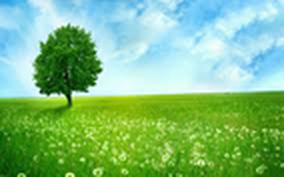

In [19]:
im_RGB_lossy = im_RGB_tiny.resize(im_size, Image.ANTIALIAS)
im_RGB_lossy

In [1]:
# Run SDP Test

import sys
import os
import numpy as np
#print(os.getcwd())
sys.path.append(os.getcwd() + "/test")
#print(sys.path)

seed_num = 2
pr_dim_update = []
cvx_tol_scale=1e-2
cvx_verbose = False

run_cvx_on_full_SDP = False

run_Newton_solver = True
use_Newton_step = True
eig_solver_Newton = "eigsh"
#eig_solver_Newton = "lobpcg"

eig_solver = "eigsh"
#eig_solver = "lobpcg"
import runtestSDPSS
(X, y, A, b, C, X_SDPSS_sub, V_SDPSS_sub, y_SDPSS) \
= runtestSDPSS.main(n = 150, m = 2, cvx_verbose=cvx_verbose, \
                    cvx_tol_scale=cvx_tol_scale, \
                    eig_solver = eig_solver, eig_solver_Newton = eig_solver_Newton, \
                    run_cvx_on_full_SDP=run_cvx_on_full_SDP, \
                    seed_num=seed_num, pr_dim_update=pr_dim_update, \
                    run_Newton_solver = run_Newton_solver, \
                    use_Newton_step = use_Newton_step)

Generating random test SDP
Solving test SDP with SDPSubspaceSolver


SDPSubspaceSolver called with eigenvalue solver eigsh and SDP solver cvx
    |                                         | Runtime Ratios | 
 it | probj        dures    prres    dugap    | eig  SDP  main | eigtol   prdim  time
  0 | 3.26901e-03 -1.00e+00 7.88e-08 1.50e-09 | 0.83 0.15 0.02 | 1.0e-08     4   0.16
  1 | 1.69765e-03 -3.39e-01 1.59e-09 4.11e-11 | 0.62 0.30 0.08 | 1.0e-10     6   0.03
  2 | 1.40225e-03 -1.94e-01 2.28e-08 1.18e-09 | 0.53 0.38 0.08 | 1.0e-12     8   0.03
  3 | 1.33493e-03 -5.99e-03 1.55e-09 1.26e-10 | 0.55 0.40 0.05 | 1.0e-14    10   0.05
  4 | 1.33483e-03 -7.69e-06 2.13e-09 1.79e-10 | 0.53 0.41 0.06 | 1.0e-14    12   0.05
  5 | 1.33483e-03  1.71e-09 6.81e-10 7.49e-11 | 0.51 0.43 0.07 | 1.0e-14    14   0.06

EXIT -- Optimal solution found.

Total runtime   :   0.39
Num eig calls   :   9


NewtonSolver called with eigenvalue solver eigsh
    |                                N-step | Runtime Rati

In [ ]:
type(A[0])
A1 = sp.sparse.csr_matrix(A[0])
type(A1)
type(A[1])
A2 = sp.sparse.csr_matrix(A[1])
type(A2)

In [ ]:
Atall = sp.sparse.vstack( [A1, A2] )
Atall.shape

In [ ]:
import numpy as np
import scipy as sp
from scipy.sparse.linalg import lobpcg
from scipy.sparse.linalg import eigsh
from scipy.sparse import identity
import time


In [ ]:
#[d, V] = eigsh(A, k = num_eigs, sigma = sigma, 
#               which = 'SA', tol = eigs_tol, maxiter=eigs_maxiters)
# eigsh(A, k=6, M=None, sigma=None, which='LM', 
#       v0=None, ncv=None, maxiter=None, tol=0, 
#       return_eigenvectors=True, Minv=None, OPinv=None, mode='normal')
i = 4;
num_eigs = 1 # 1
bk_sz = 40 # 20
sigma = None # None
eigs_tol = 1e-3 # 1e-6
maxiter = 20000 # 2000
v0 = v_prev # None
shift_mat = False
shift_val = np.float(-0.490)

if shift_mat:
    n = M[0].shape[0]
    t = shift_val
    S = t*identity(n, dtype='float64', format='csc')
    A = M[i] + S
else:
    A = M[i]

time_start = time.time()
[d, V] = eigsh(A, k = num_eigs, ncv = bk_sz, sigma = sigma, \
               which = 'SA', tol = eigs_tol, maxiter=maxiter, \
               v0=v0)
run_time = time.time() - time_start

In [ ]:
de = min(d)
if shift_mat:
    de = de - np.float(shift_val)
[de, run_time]

In [ ]:
#[d, V] = lobpcg(A, X, B=None, M=None, Y=None, tol=None, maxiter=20, 
#                largest=True, verbosityLevel=0, 
#                retLambdaHistory=False, retResidualNormsHistory=False)

tol_l = 1e-6
maxiter_l = 10000

time_start = time.time()
[dl, Vl] = lobpcg(A, v_prev, B=None, M=None, Y=None, tol=tol_l, maxiter=maxiter_l, \
                largest=False, verbosityLevel=0, \
                retLambdaHistory=False, retResidualNormsHistory=False)
run_time = time.time() - time_start

In [ ]:
# Fixing SDPSS
sys.path.append(os.getcwd() + "/test")
from SDPSubspaceSolver import *
[X_SDPSS_sub, V_SDPSS_sub, y_SDPSS, time_total, M] \
    = SDPSubspaceSolver(A, b, C, eigsh_tol=1e-10, \
                        eigsh_tol_update=1e-2, eigsh_tol_min=1e-14, \
                        eigsh_maxiters = 20000, cvx_verbose=False)

In [ ]:
sys.path.append(os.getcwd() + "/src/util")
from ComputeAadjoint import *
from scipy.sparse.linalg import eigsh
#pr_res_SDPSS = np.linalg.norm(ComputeAforward(A,X_SDPSS) - b)
Aty_SDPSS = ComputeAadjoint(A,y_SDPSS)
[du_res_SDPSS, V] = eigsh(C-Aty_SDPSS, k = 1, which = 'SA', tol = 1e-14, maxiter=20000)
#pr_obj = np.tensordot(C,X_SDPSS,2)
#du_obj = np.tensordot(b,y_SDPSS,2)
#gap_res_SDPSS = pr_obj - du_obj # must be >= 0 if pr and du feasible
du_res_SDPSS

In [ ]:
import numpy as np
n = 4000
m = 4000
A = np.random.rand(m,n)
b = np.random.rand(m,1)

In [ ]:
x_lu = np.linalg.solve(A, b)
np.linalg.norm(A.dot(x_lu) - b)

In [ ]:
AtA = A.transpose().dot(A)
Atb = A.transpose().dot(b)
from scipy.sparse.linalg import cg

In [ ]:
cg_tol = 1e-16
cg_maxiter = round(n/10)
x_cg_temp = cg(AtA, Atb, tol=cg_tol, maxiter=cg_maxiter)
x_cg = np.reshape(x_cg_temp[0], (n,1))
np.linalg.norm(A.dot(x_cg) - b) / np.linalg.norm(b)

In [ ]:
from tkinter import *

root = Tk()

def key(event):
    print("pressed", repr(event.char))

def callback(event):
    frame.focus_set()
    print("clicked at", event.x, event.y)

frame = Frame(root, width=100, height=100)
frame.bind("<Key>", key)
frame.bind("<Button-1>", callback)
frame.pack()

root.mainloop()

In [ ]:
# Compares `eigsh` with `lobpcg`
import numpy as np
import scipy as sp
from scipy.sparse import spdiags
from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import lobpcg
from scipy.linalg import orth
def get_rand_sym_mat(n, is_PD=True):
    U = orth(np.random.rand(n,n))
#    np.matmul(np.matmul(V_sub.transpose(),C),V_sub)
    D = np.diag(np.random.rand(n)) + np.ones((n))
    M = np.matmul(np.matmul(U,D), U.transpose())
    M = M + M.transpose()
    return M